In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [5]:
air_quality=fetch_ucirepo(id=360)

In [6]:
data=air_quality.data.features
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [7]:
#Data Preprocessing Steps
df=data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [8]:
df.isna().sum()

,0
CO(GT),0
C6H6(GT),0
NOx(GT),0
NO2(GT),0


In [9]:
df.dtypes

,0
CO(GT),float64
C6H6(GT),float64
NOx(GT),int64
NO2(GT),int64


In [11]:
#parameters for isolation forest
n_estimators = 100 #number of trees in the forest
contamination = 0.1 #proportion of outliers in the dataset
sample_size = 256 #number of samples to draw from the dataset to train each tree
# random_state = 42 #random seed for reproducibility

In [13]:
from sklearn.ensemble import IsolationForest

#Train the isolation forest model
model = IsolationForest(n_estimators=n_estimators,
                        contamination=contamination,
                        max_samples=sample_size,
                        random_state=42)

In [14]:
model.fit(df)
#predict anomalies
anomaly_labels=model.predict(df)
#Add anomaly labels to the dataframe
df['anomaly']=anomaly_labels
#anomaly_labels will be -1 for anomalies and 1 for normal data points
anomaly_labels


/tmp/ipython-input-1641530387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly']=anomaly_labels


In [16]:
#check the value counts of the anomaly labels
df['anomaly'].value_counts()

,count
anomaly,
1,8421
-1,936


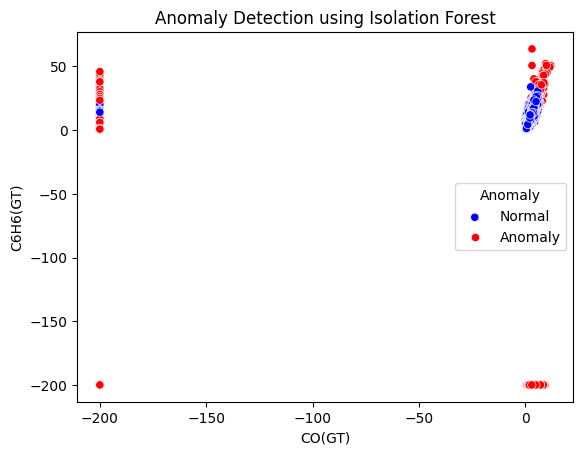

In [17]:
#visualize the anomalies
sns.scatterplot(data=df, x='CO(GT)', y='C6H6(GT)', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('CO(GT)')
plt.ylabel('C6H6(GT)')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

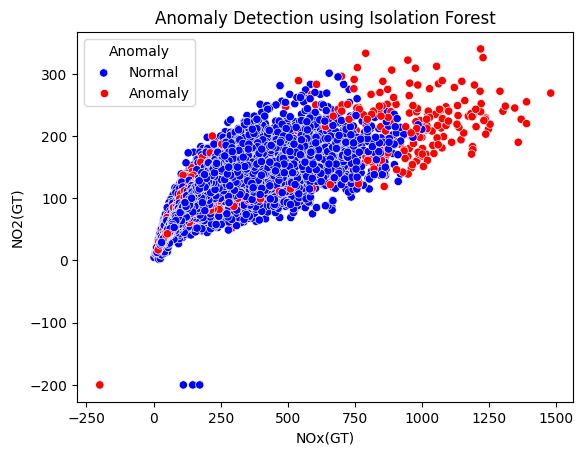

In [18]:
#plot 2
sns.scatterplot(data=df, x='NOx(GT)', y='NO2(GT)', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('NOx(GT)')
plt.ylabel('NO2(GT)')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

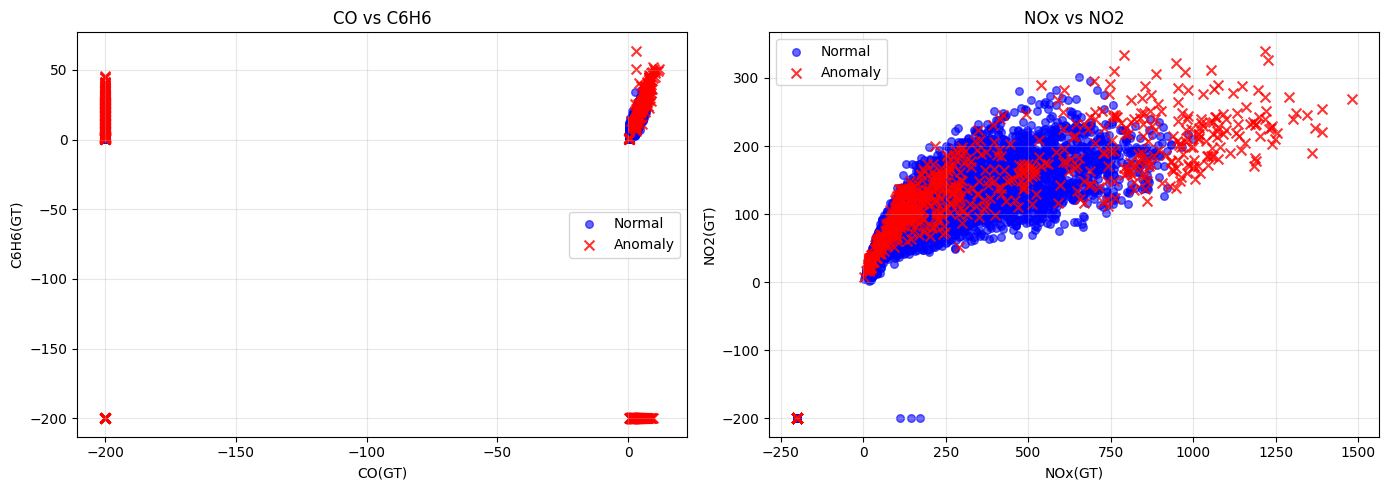

Normal data points: 8421
Anomalies detected: 936


In [19]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]

# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")